<a href="https://colab.research.google.com/github/shivanshgautam111997-prog/Assignments-/blob/main/Bike_Sharing_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement-¶
Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

- dtime: Date & Time
- season: Season (1:springer, 2:summer, 3:fall, 4:winter)
- weekday: Day of the week
- workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit: (extracted from Freemeteo)
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + - Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_bikes.csv to train_bikes.csv


In [ ]:
train = pd.read_csv('train_bikes.csv', parse_dates=['datetime'])

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


<Axes: xlabel='season', ylabel='count'>

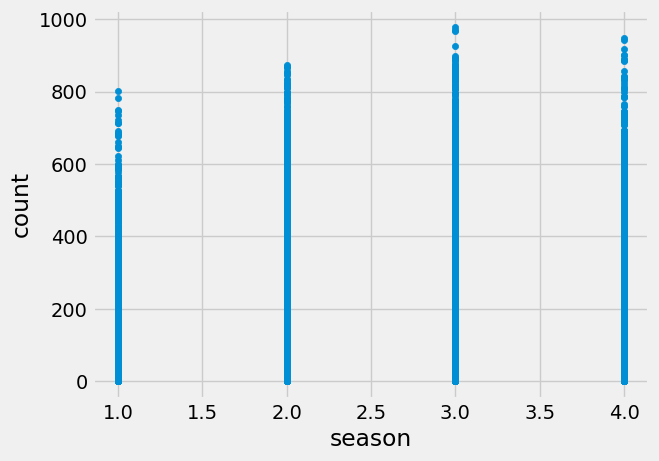

In [ ]:
train.plot.scatter(x = 'season', y = 'count')

<Axes: xlabel='holiday', ylabel='count'>

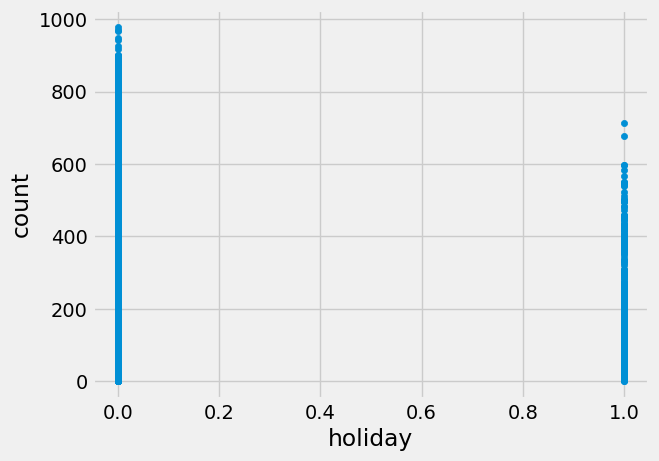

In [ ]:
train.plot.scatter(x = 'holiday', y = 'count')

<Axes: xlabel='workingday', ylabel='count'>

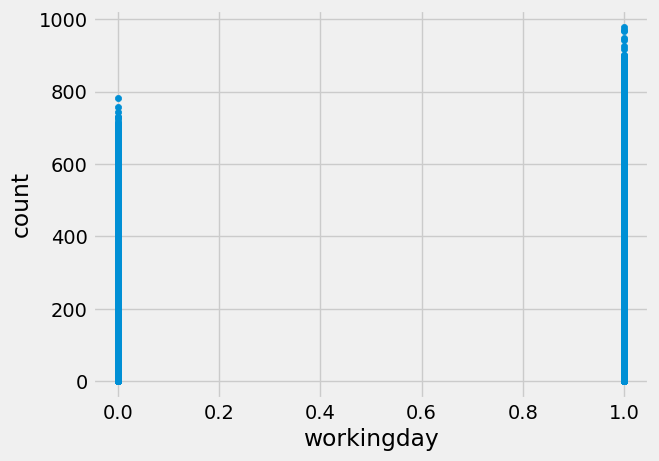

In [ ]:
train.plot.scatter(x = 'workingday', y = 'count')

<Axes: xlabel='weather', ylabel='count'>

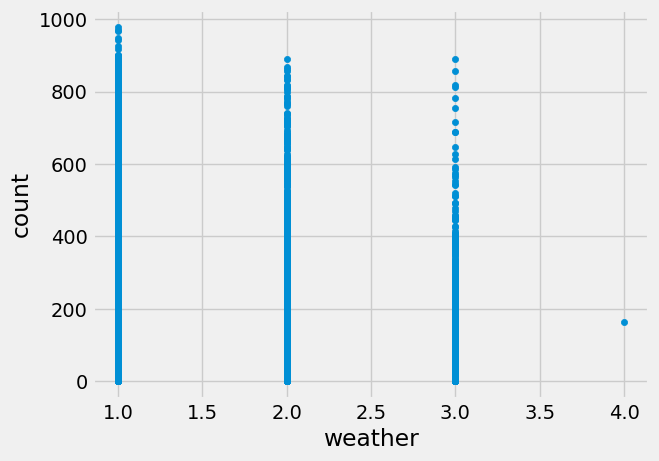

In [ ]:
train.plot.scatter(x = 'weather', y = 'count')

<Axes: xlabel='temp', ylabel='count'>

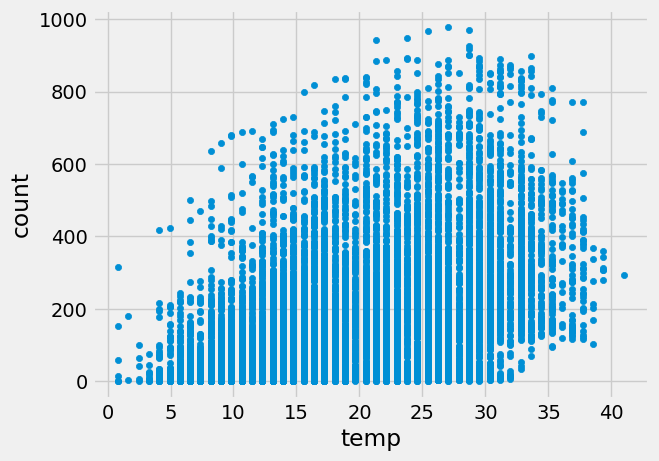

In [ ]:
train.plot.scatter(x = 'temp', y = 'count')

<Axes: xlabel='atemp', ylabel='count'>

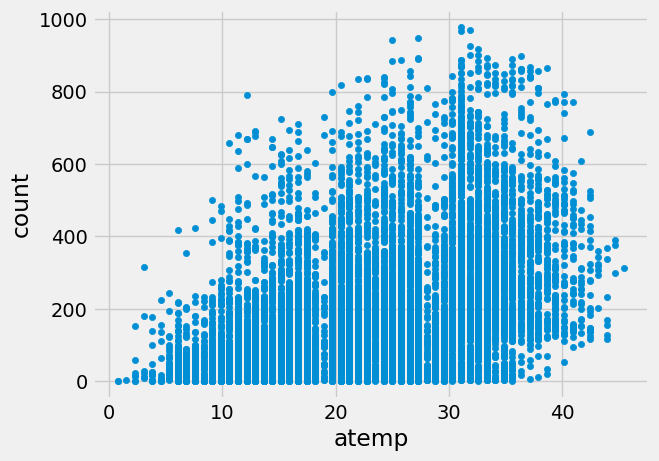

In [ ]:
train.plot.scatter(x = 'atemp', y = 'count')

<Axes: xlabel='humidity', ylabel='count'>

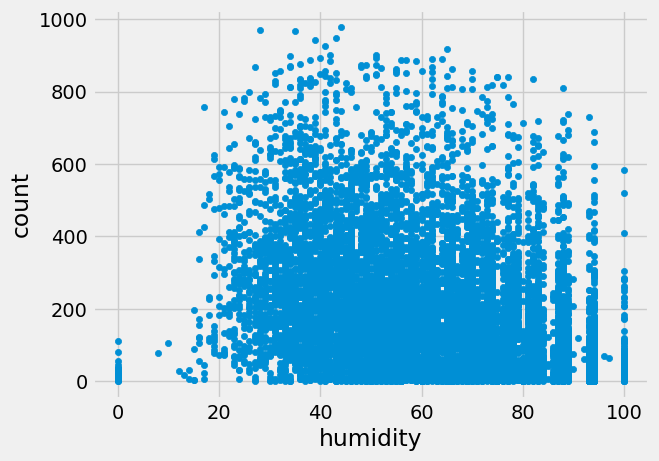

In [ ]:
train.plot.scatter(x='humidity',y='count')

<Axes: xlabel='windspeed', ylabel='count'>

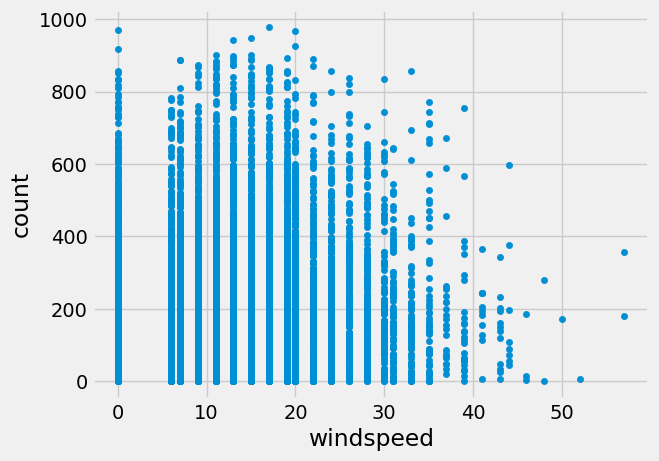

In [ ]:
train.plot.scatter(x = 'windspeed', y = 'count')

<Axes: xlabel='casual', ylabel='count'>

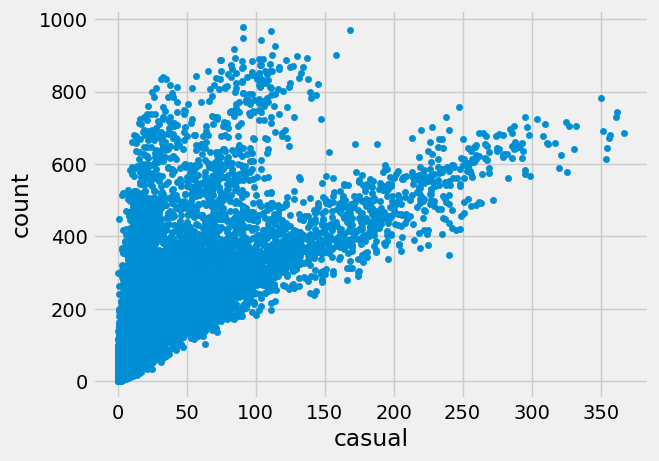

In [ ]:
train.plot.scatter(x = 'casual', y = 'count')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


FileNotFoundError: [Errno 2] No such file or directory: 'test_bikes.csv'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_bikes.csv to test_bikes.csv


In [ ]:
test = pd.read_csv('test_bikes.csv')

In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [ ]:
train.shape

(10886, 12)

In [ ]:
train.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


## Hour wise report

/tmp/ipython-input-1906032113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.loc[:, ('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument
/tmp/ipython-input-1906032113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.loc[:, ('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument


<Axes: title={'center': 'Year = 2012'}, xlabel='hour'>

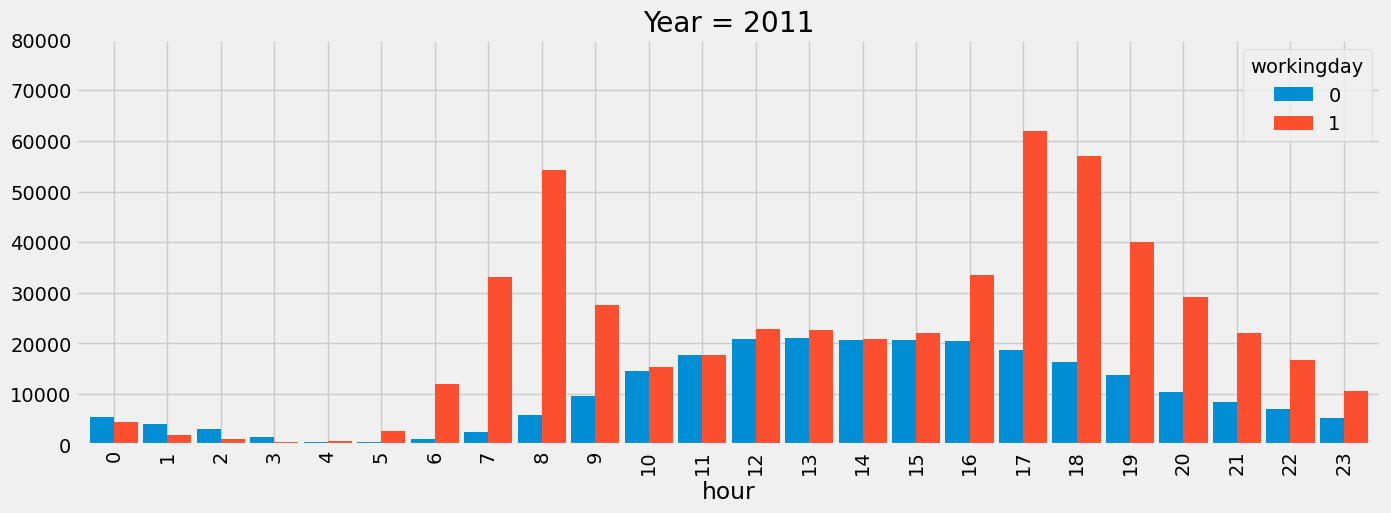

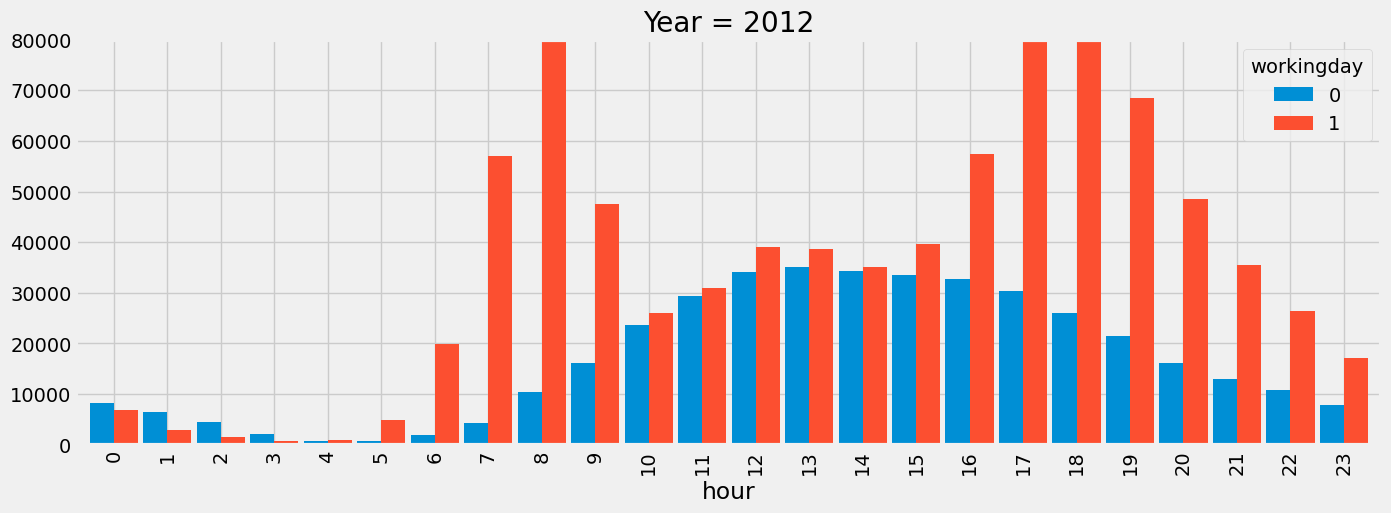

In [ ]:
# method for creating the count plot based on hour for a given year
def plot_by_hour(data, year=None, agg='sum'):
    dd = data
    if year: dd = dd[ dd.datetime.dt.year == year ]
    dd.loc[:, ('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument

    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack() # groupby hour and working day
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year)) # returning the figure grouped by hour


plot_by_hour(train, year=2011) # plotting the count plot based on hour for 2011
plot_by_hour(train, year=2012) # plotting the count plot based on hour for 2012

## Hour and Month wise report

<Axes: title={'center': 'Rent bikes per hour in 2011 and 2012'}, xlabel='hour'>

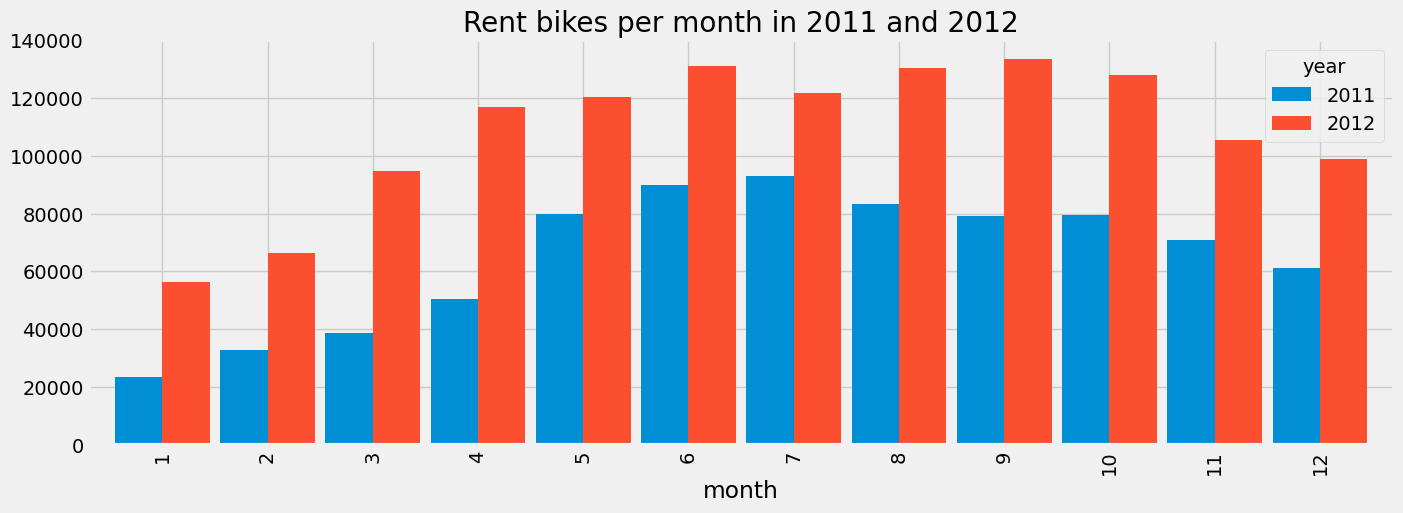

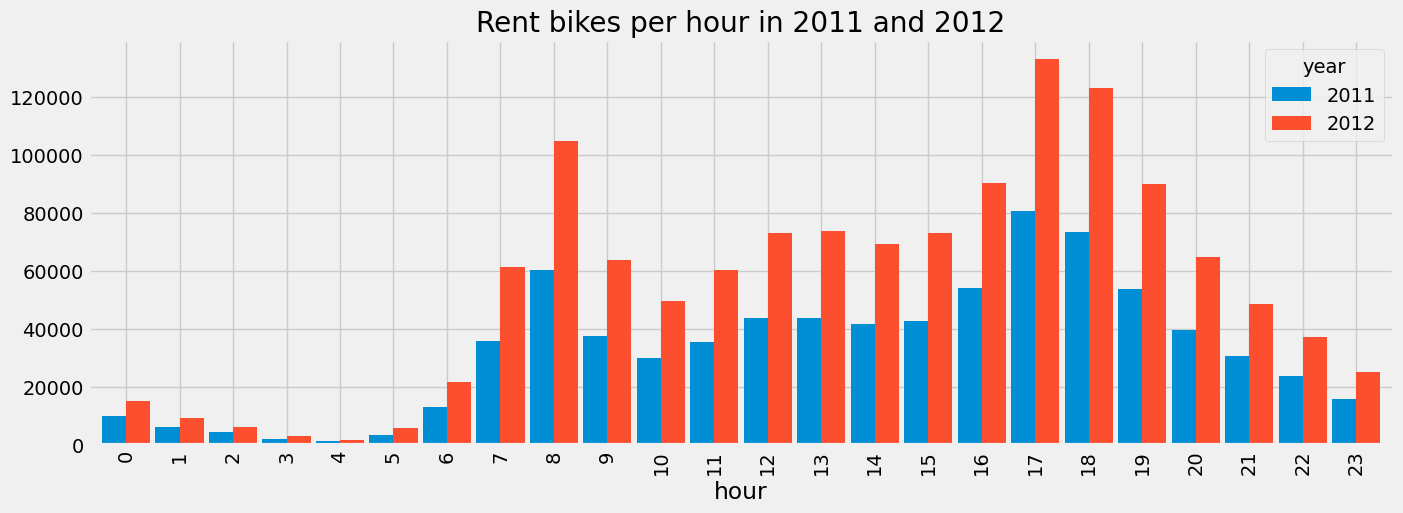

In [ ]:

def plot_by_year(agg_attr, title):
    dd = train.copy()
    dd['year'] = train.datetime.dt.year
    dd['month'] = train.datetime.dt.month
    dd['hour'] = train.datetime.dt.hour

    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack()
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title)


plot_by_year('month', "Rent bikes per month in 2011 and 2012")
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012")

In [ ]:
def plot_hours(data, message = ''):
    dd = data.copy()
    dd['hour'] = data.datetime.dt.hour

    hours = {}
    for hour in range(24):
        hours[hour] = dd[ dd.hour == hour ]['count'].values

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )

    axis = plt.gca()
    axis.set_ylim([1, 1100])

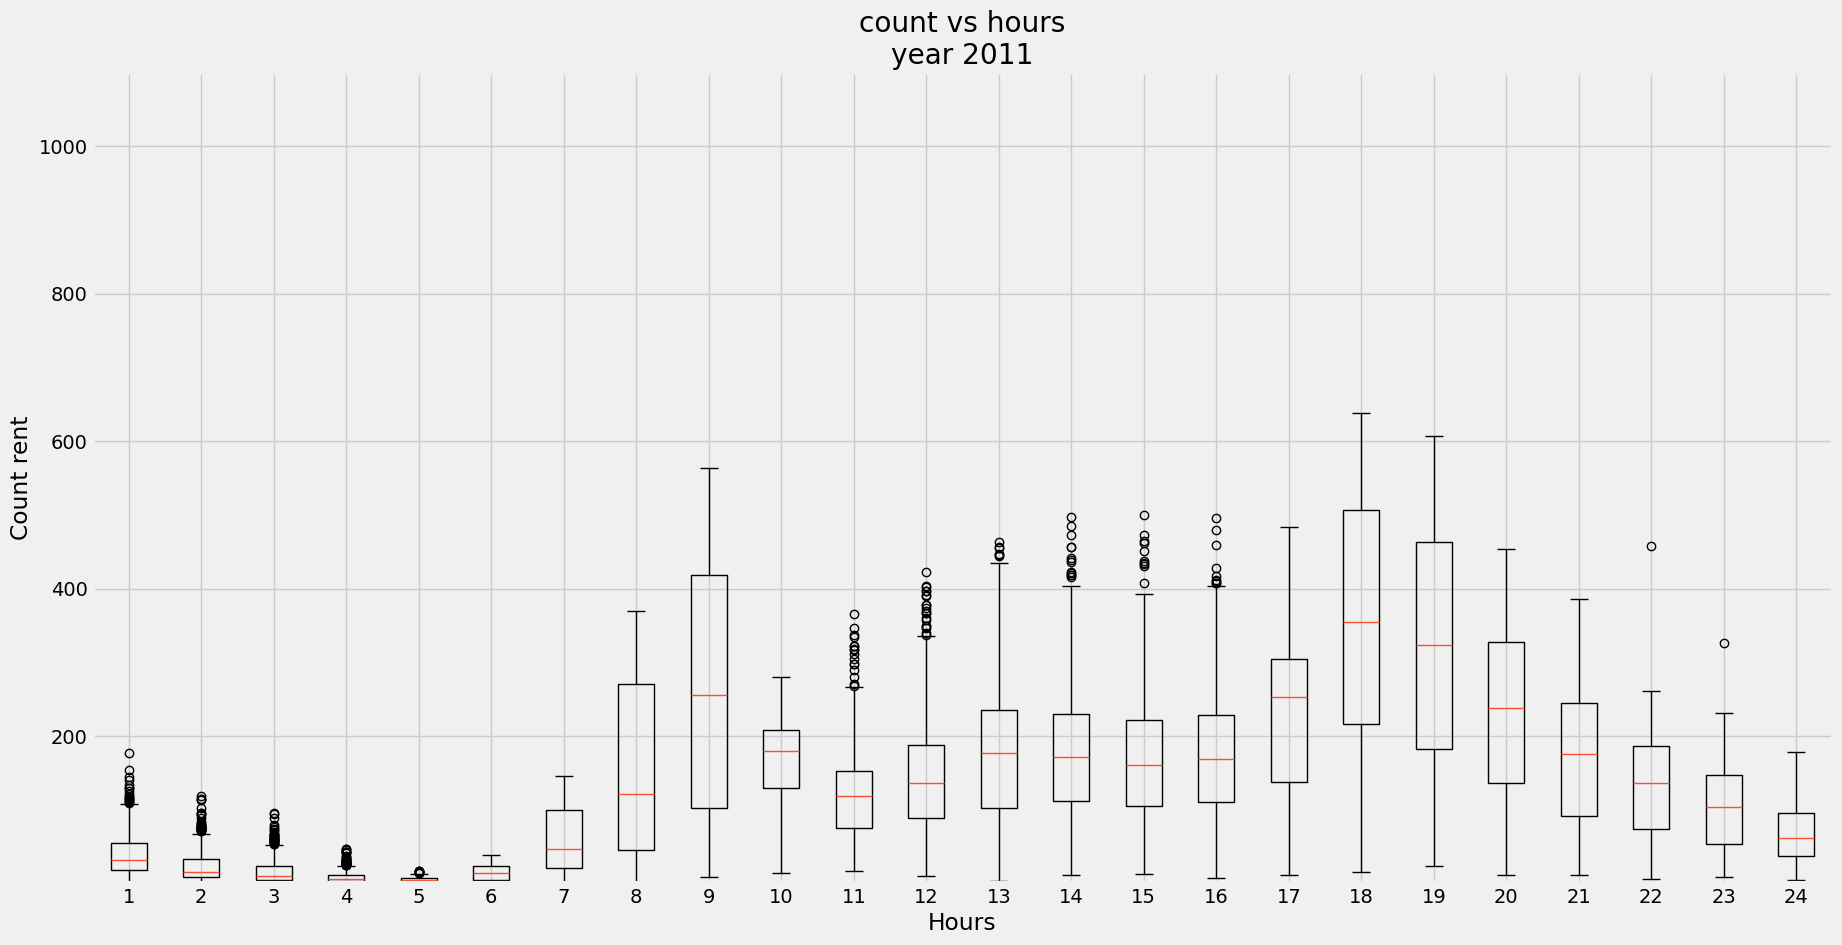

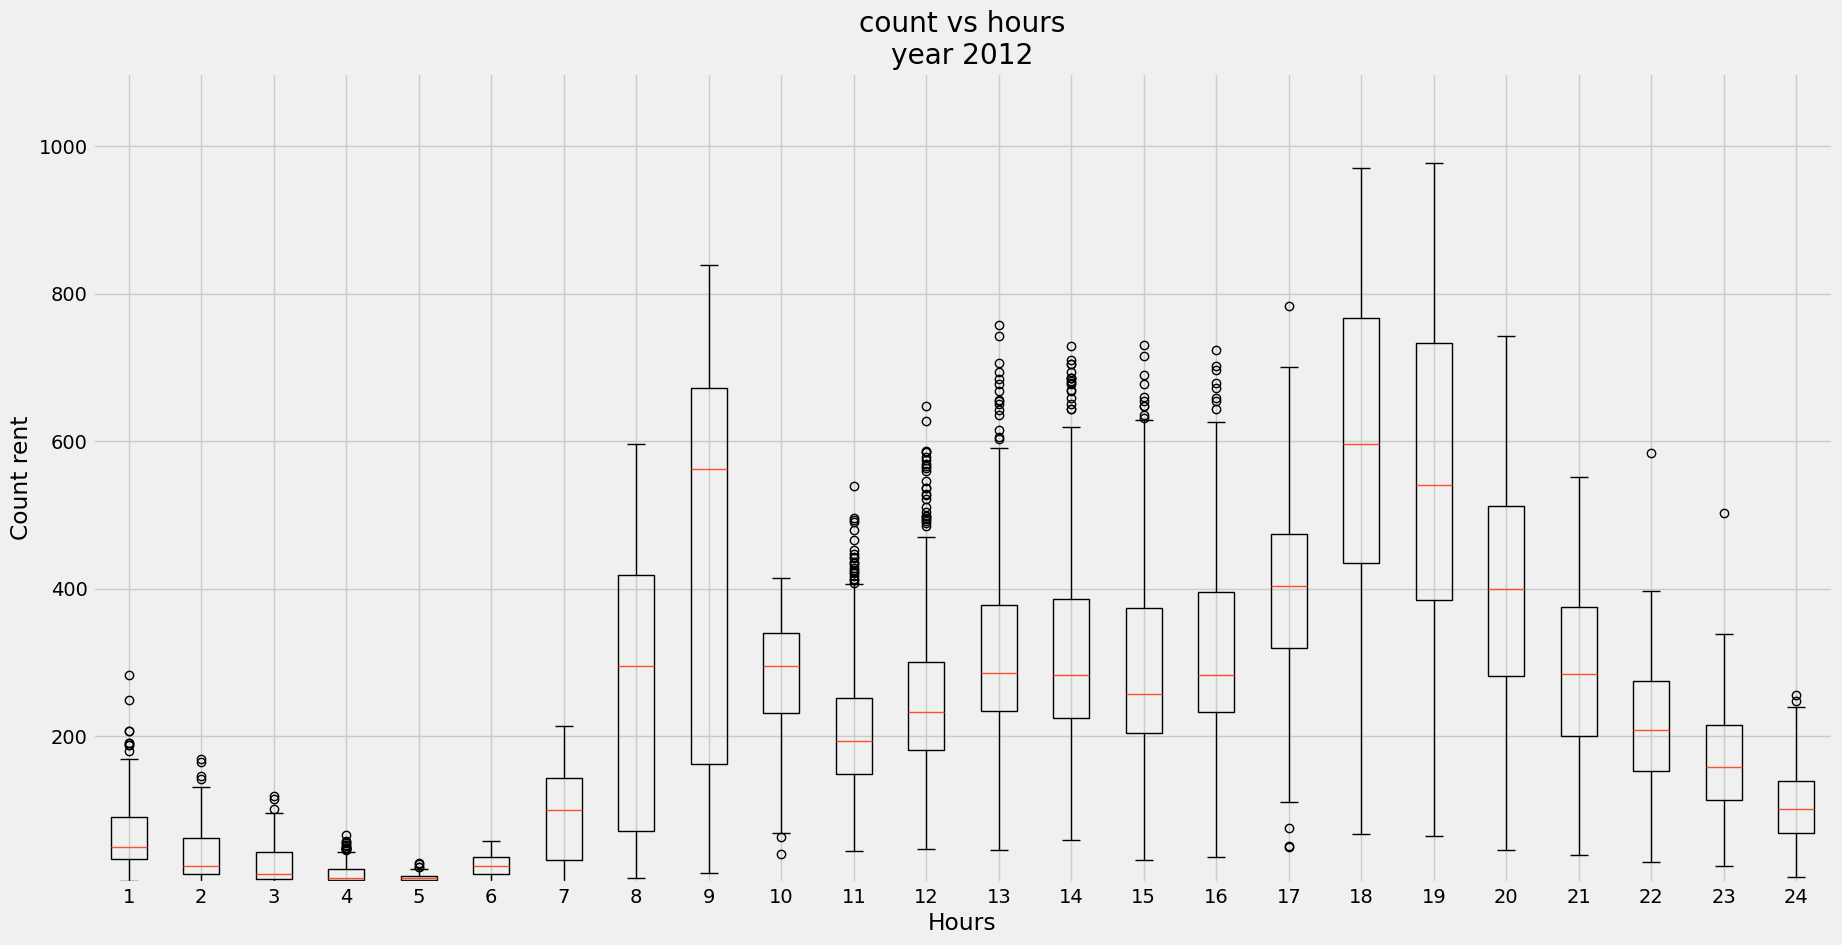

In [ ]:
plot_hours( train[train.datetime.dt.year == 2011], 'year 2011')
plot_hours( train[train.datetime.dt.year == 2012], 'year 2012')

In [ ]:
dt = pd.to_datetime(train['datetime'])
train['hour'] = dt.map(lambda x: x.hour)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [ ]:
dt_test = pd.to_datetime(test["datetime"])
test["hour"] = dt_test.map(lambda x: x.hour)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


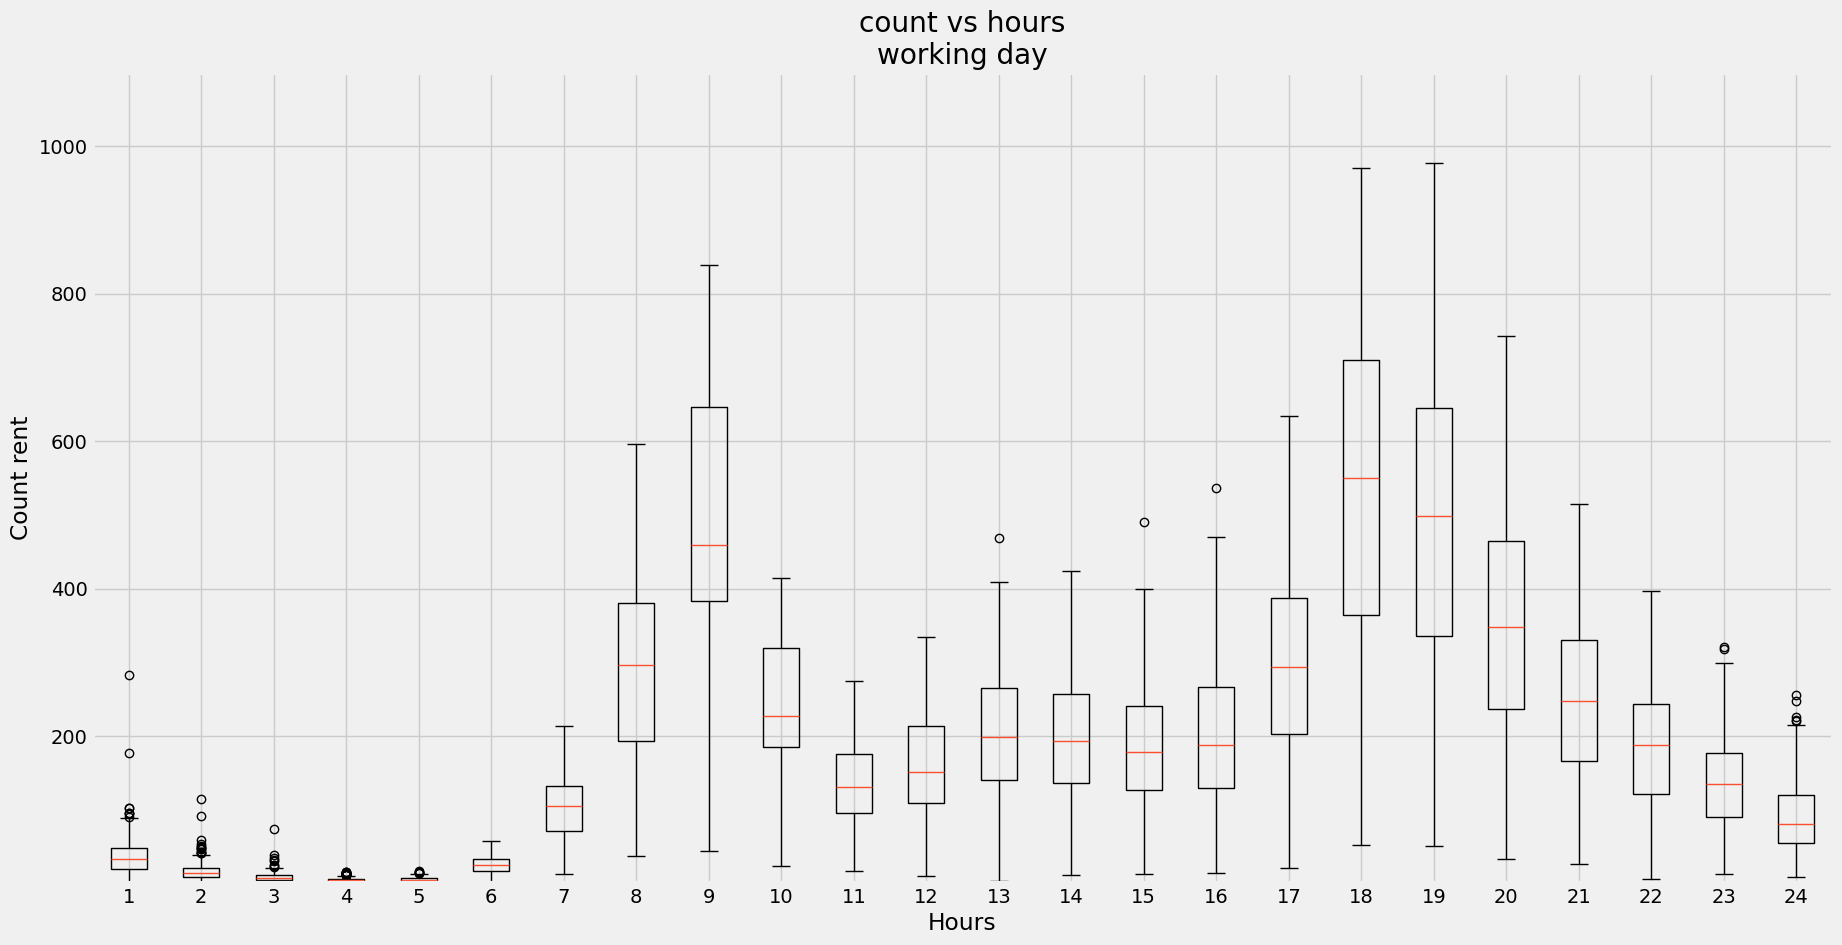

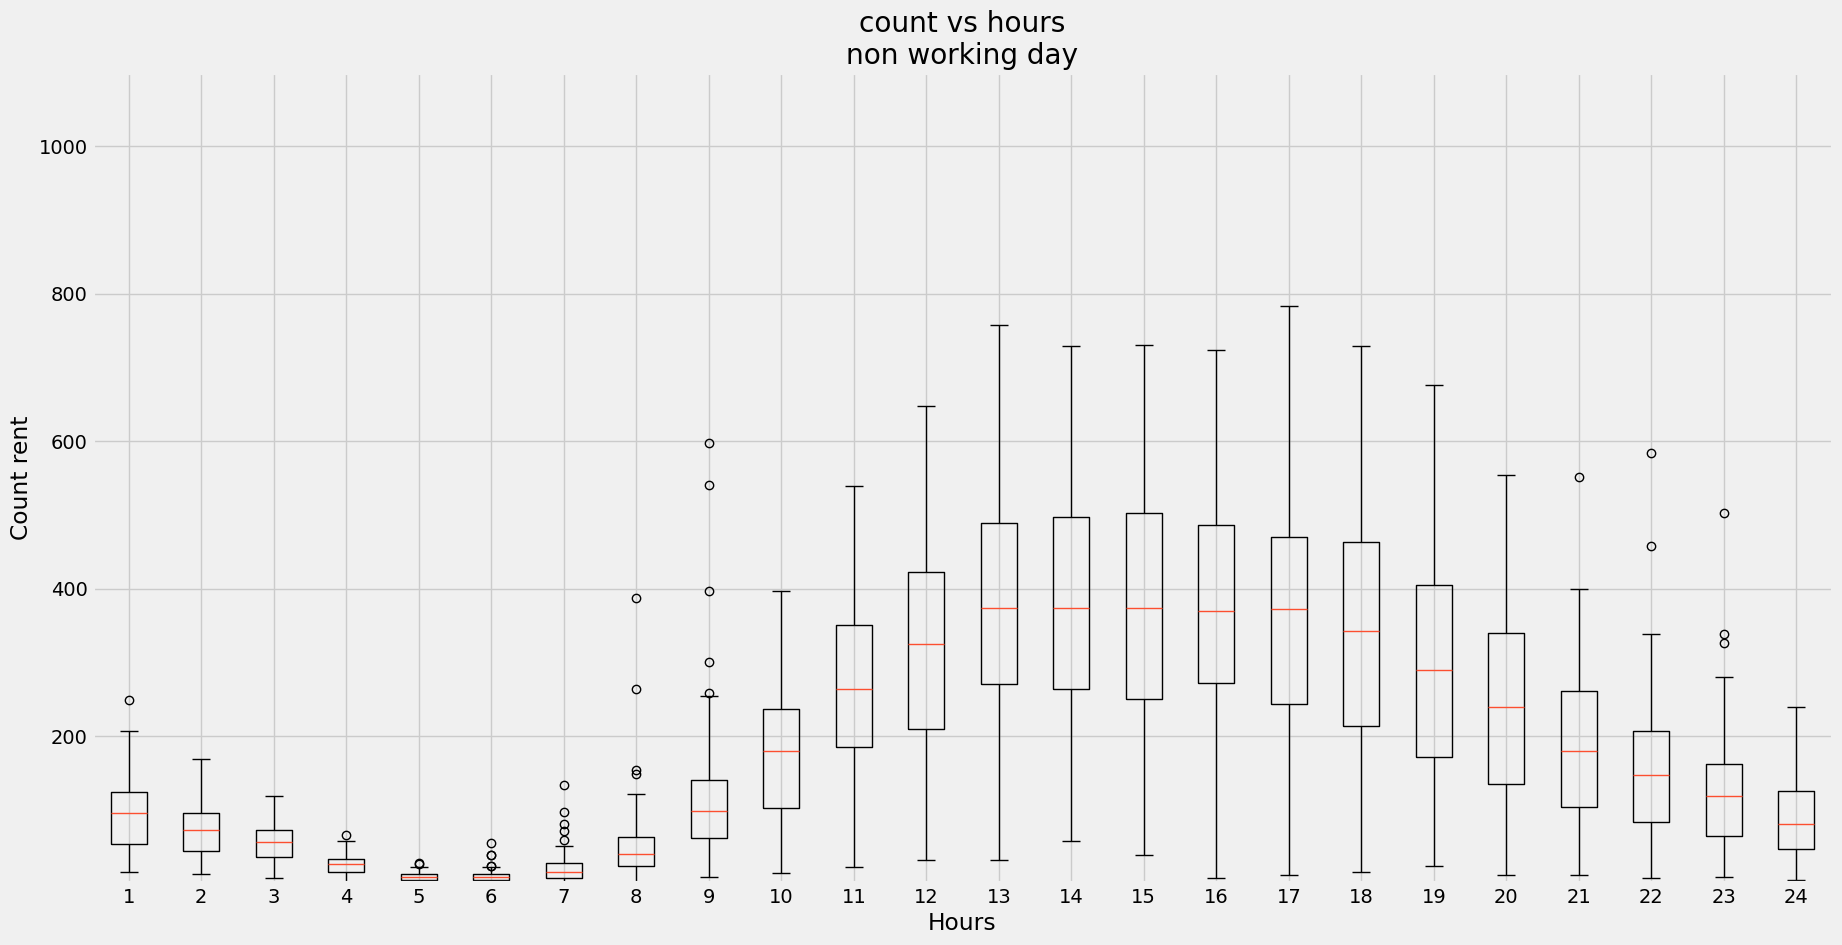

In [ ]:
plot_hours( train[train.workingday == 1], 'working day')
plot_hours( train[train.workingday == 0], 'non working day')

# convert categorical data to numerical data

In [ ]:

def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [ ]:
train['hour'] = train['hour'].apply(categorical_to_numeric)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [ ]:
test['hour'] = test['hour'].apply(categorical_to_numeric)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [ ]:
train = train.drop(['datetime'], axis=1)
test = test.drop(['datetime'], axis=1)

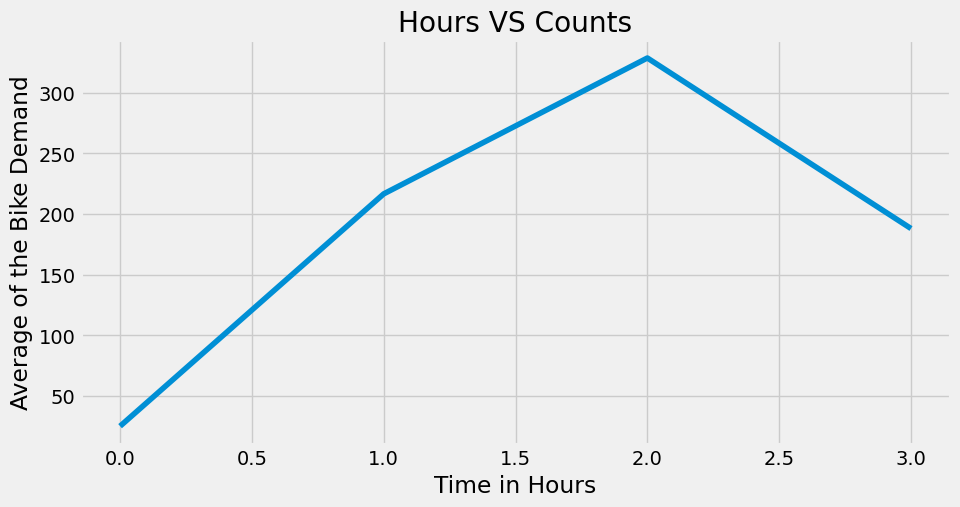

In [ ]:
figure,axes = plt.subplots(figsize = (10, 5))
hours = train.s(["hour"]).agg("mean")["count"]
hours.plot(kind="line", ax=axes)
plt.title('Hours VS Counts')
axes.set_xlabel('Time in Hours')
axes.set_ylabel('Average of the Bike Demand')
plt.show()

In [ ]:
a = train.groupby('temp')[['count']].mean()
print(a)

            count
temp             
0.82    77.714286
1.64    91.500000
2.46    43.000000
3.28    19.272727
4.10    50.272727
4.92    58.416667
5.74    53.233645
6.56    68.109589
7.38    67.754717
8.20    81.995633
9.02    73.616935
9.84    86.442177
10.66   92.560241
11.48  111.066298
12.30  120.002597
13.12  148.547753
13.94  145.053269
14.76  152.957173
15.58  179.682353
16.40  170.217500
17.22  182.609551
18.04  160.878049
18.86  159.692118
19.68  185.058824
20.50  204.672783
21.32  196.480663
22.14  184.717122
22.96  212.392405
23.78  235.650246
24.60  237.182051
25.42  222.062035
26.24  232.403974
27.06  211.025381
27.88  203.433036
28.70  257.679157
29.52  277.691218
30.34  303.193980
31.16  352.801653
31.98  318.683673
32.80  355.623762
33.62  348.323077
34.44  340.225000
35.26  342.934211
36.08  362.869565
36.90  318.717391
37.72  332.176471
38.54  238.857143
39.36  317.833333
41.00  294.000000


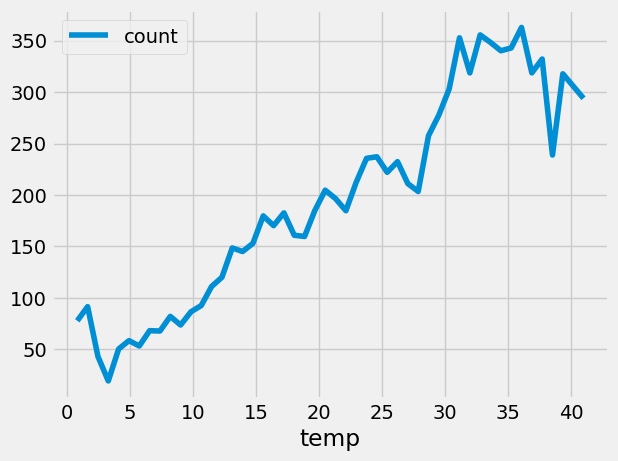

In [ ]:
a.plot()
plt.show()

In [ ]:
a = train.groupby('holiday')[['count']].mean()

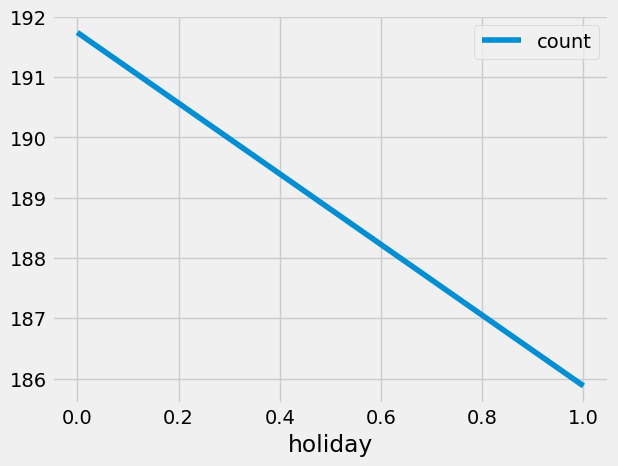

In [ ]:
a.plot()
plt.show()

# Features Selection
### method to  select the features. If a feature is not in the blaklist, it gets selected

In [ ]:
def select_feature(data):
  black_list = ['casual','registerad','count','is_test''datetime', 'count_log']
  return [feat for feat in data.columns if feat not in black_list]

# A method to show results of various model and their predictions

In [ ]:
def _simple_modeling(X_train, X_test, y_train, y_test):
    # sepcifying the model names
    models = [
        ('dummy-mean', DummyRegressor(strategy='mean')),
        ('dummy-median', DummyRegressor(strategy='median')),
        ('random-forest', RandomForestRegressor(random_state=0)),
    ]

    results = []

    for name, model in models:
        model.fit(X_train, y_train)# fitting the training data to model
        y_pred = model.predict(X_test) # doing predictions using the model

        results.append((name, y_test, y_pred)) # creating the list of predictions from various models

    return results

# a method to return the performance metric of the model used in the above method
def simple_modeling(X_train, X_test, y_train, y_test):
    results = _simple_modeling(X_train, X_test, y_train, y_test) # using the function defined above to caluclate the predictions

    return [ (r[0], rmsle(r[1], r[2]) ) for r in results] # returning the performance metrics


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor(n_estimators=100) # instantiating the random Forest Regressor

score = cross_val_score(forest_reg, train, train, cv=4) # calcuating the cross validation score
print (score)


[ 0.23655893  0.16906489 -0.0247874   0.07487245]
